# 作业1 数据预处理和线性回归

## Pandas读取数据集
现已使用Pandas读取数据集challenge.csv
* 请提取该数据集的字段名称，将结果存为cols  
* 请获取给数据的字段和样本数量，将结果分别存为col_num和sam_num  
* 请获取该数据集的前五行记录，将最后的DataFrame存为five_data  

**开始答题：**

In [1]:
import pandas as pd
titanic = pd.read_csv('dataset\challenge.csv', delimiter='\t')
titanic.head()

,cj_area,gate_a,gate_b,pt_area,length,height
0,1B550_001,1B550_001_1,Pio_520,P_520,3614.125890,-29.97
1,1B550_001,1B550_001_1,Pio_550,P_550,4088.875849,0.57
2,1B550_001,1B550_001_1,Pio_580,P_580,4717.117915,30.79
3,1B550_001,1B550_001_1,WPio2,WP2,3024.008264,140.00
4,1B550_001,1B550_001_1,WPio3,WP3,2699.671060,119.58


In [2]:
# 获取字段名称
cols = list(titanic)    # 返回List
print(cols)             
cols = titanic.columns  # 返回Index
print(cols)

['cj_area', 'gate_a', 'gate_b', 'pt_area', 'length', 'height']
Index(['cj_area', 'gate_a', 'gate_b', 'pt_area', 'length', 'height'], dtype='object')


In [3]:
# 获取字段数量
col_num = len(cols)

In [4]:
# 获取前5行样本
five_data = titanic.head(5)

## stats正态性检验
现已使用Numpy生成服从均匀分布的一维数据集，样本容量为100;
* 使用scipy库中的stats模块，对生成的数据进行正态性检验，将检验的结果存为model

**开始答题：**

In [5]:
import numpy as np
from scipy.stats import stats
test_data = np.random.random(size=100)

In [6]:
# 验证分布
model = stats.kstest(test_data, cdf='norm', alternative='two_sided')  # 可设置less或greater做单尾
print(model)

KstestResult(statistic=0.5035677802805535, pvalue=5.3524027519791995e-24)


## 整体散度
下列属于衡量数据整体散度的是（可多选）：  
a. 欧式距离  
b. 标准差  
c. 分位数  
d. 众数  

**答案：bc**

## 缺失值处理
现已使用Pandas生成Series对象example_data  
* 请使用isnull()函数确定example_data是否含有缺失值，将最后的结果存为boolean_array  
* 请使用fillna()函数使用字符串missing替换缺失值，将替换后的Series对象存为new_data

**开始答题：**

In [7]:
import pandas as pd 
import numpy as np
example_data = pd.Series([1,2,3,np.nan,4])

In [8]:
# 判断是否含有缺失值
boolean_array = example_data.isnull()
print(boolean_array)

0    False
1    False
2    False
3     True
4    False
dtype: bool


In [9]:
# 缺失值替换
new_data = example_data.fillna(method='pad') # 用前一个值填充
print(new_data)

0    1.0
1    2.0
2    3.0
3    3.0
4    4.0
dtype: float64


## 数据离散化
现已使用Pandas读取数据集birthrate.csv
* 请对该数据集的birth_rates特征使用四分位数作为切分点，通过qcut()函数完成等频离散化; 将最后的结果存为data_qcut
该数据集详情为：
 |       | country   | birth_rates | per_capita_income | proportion_of_population_farming | infant_mortality |
| ----- | --------- | ----------- | ----------------- | -------------------------------- | ---------------- |
| **0** | Venezuela | 46.4        | 392               | 0.40                             | 68.5             |
| **1** | Mexico    | 45.7        | 110               | 0.61                             | 87.8             |
| **2** | Ecuador   | 45.3        | 44                | 0.53                             | 115.8            |
| **3** | Colombia  | 38.6        | 158               | 0.53                             | 106.8            |
| **4** | Ceyion    | 37.2        | 81                | 0.53                             | 71.6             |

In [28]:
import pandas as pd
#data = pd.read_excel('dataset\\birthrate.xlsx')
data = pd.read_csv('dataset\\birthrate1.csv')

In [39]:
# data_qcut = data.copy()
data_qcut = pd.qcut(data['birth_rates'], q=5)
print(data_qcut)
data_qcut.value_counts()

0                  (45.84, 46.4]
1                 (45.46, 45.84]
2                 (42.62, 45.46]
3                 (38.32, 42.62]
4    (37.199000000000005, 38.32]
Name: birth_rates, dtype: category
Categories (5, interval[float64]): [(37.199000000000005, 38.32] < (38.32, 42.62] < (42.62, 45.46] < (45.46, 45.84] < (45.84, 46.4]]


(37.199000000000005, 38.32]    1
(38.32, 42.62]                 1
(42.62, 45.46]                 1
(45.46, 45.84]                 1
(45.84, 46.4]                  1
Name: birth_rates, dtype: int64

## 线性回归 
给定数据：  
X: 0, 0, 1, 1, 2, 2;  
Y: 0, 1, 0, 1, 0, 1.  
(a) 拟合模型 $Y = a+bX+\epsilon$ （手算）  
(b) 拟合模型 $Y=bX+\epsilon$ （手算）

**答案**  
(a) 
记矩阵$X^T= \begin{bmatrix} 1&1&1&1&1&1\\ 0&0&1&1&2&2\end{bmatrix}$  
根据最小二乘法，可以求导得出最小二乘解为：  
$$ 
\begin{bmatrix} \hat{a}\\ \hat{b} \end{bmatrix}
= (X^TX)^{-1}X^TY
= \begin{bmatrix} 6&6\\ 6&10 \end{bmatrix}^{-1} \cdot \begin{bmatrix} 3\\3 \end{bmatrix}
= \begin{bmatrix} \frac12 \\ 0 \end{bmatrix}
$$
所以求得回归模型为：$Y=\frac12+\epsilon$  
(b)
同理计算可得：
$$
\begin{bmatrix} 0&0&1&1&2&2\end{bmatrix}^T \begin{bmatrix} 0&0&1&1&2&2\end{bmatrix} = 10 \\
\begin{bmatrix} 0&0&1&1&2&2\end{bmatrix}^T \begin{bmatrix} 0&1&0&1&0&1\end{bmatrix} = 3 \\
\hat{b} = 10^{-1} \cdot 3 = 0.3
$$  
所以求得回归模型为：$Y=0.3X+\epsilon$ 

## 线性回归
给定数据：  
X: 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11,12, 12   
Y: 42, 44, 51, 48, 51, 54, 57, 54, 57, 63, 61, 69, 70, 70, 70, 72, 74, 83, 84, 81, 84, 85, 91, 86, 91, 95  
写程序拟合模型Y = a + b X + ε,并画图显示数据点和拟合曲线。

In [58]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

X = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11,12, 12]
Y = [42, 44, 51, 48, 51, 54, 57, 54, 57, 63, 61, 69, 70, 70, 70, 72, 74, 83, 84, 81, 84, 85, 91, 86, 91, 95]

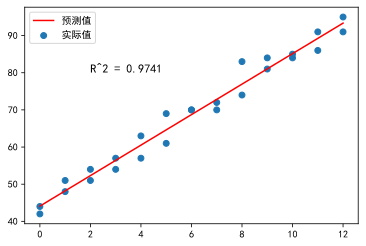

In [63]:
import scipy.stats as st

slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)
x = np.linspace(min(X), max(X))
y = intercept + slope*x
plt.scatter(X, Y, label='实际值')
plt.plot(x, y, 'r-', label='预测值')
plt.text(2, 80, 'R^2 = {}'.format(round(pow(r_value,2),4)), fontsize=12)
plt.legend()
plt.show()

## 梯度下降
给定 $f(x)= x^3-6x^2+11x-6$, 编程实现梯度下降法计算出使$f(x)=0$的解，绘图展示梯度下降法的迭代过程。

**解题思路**    
要求函数的零点，即要最小化$|f(x)|$，于是设计梯度下降法最小化其绝对值函数即可；  
但是这样的话问题来了，$|f(x)|$并不光滑，由于零点$f(x)$未知，我们也无法计算出$|f(x)|$的梯度；  
后来看到群里有一个同学说，可以找$f(x)$的原函数，很有道理呀！我大受启发，于是就这么干了！

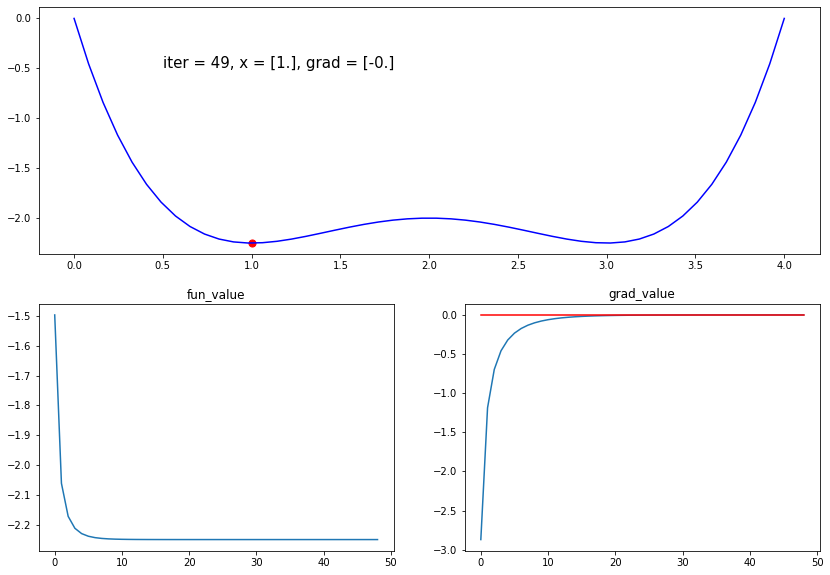

In [156]:
from numpy.random import rand
from IPython import display
from matplotlib import pyplot as plt

def func(x):
    fx = 0.25*pow(x,4) - 2*pow(x,3) + 5.5*pow(x,2) -6*x
    grad = pow(x, 3) - 6*pow(x, 2) + 11*x -6
    return fx, grad

lr = 0.1  # 学习速率，步长
tol = 1e-5  # 迭代精度

x = rand(1)*4  # 限定初始点范围[0,4)
X = np.array([])
fX = np.array([])
gX = np.array([])
fx, grad = func(x)

# 开始迭代
while abs(grad) > tol: 
# for i in range(5):
    plt.figure(figsize=(14, 10))
    plt.subplot(211)
    X0 = np.linspace(min(0,x), max(4,x))
    fX0, tmp = func(X0)
    plt.plot(X0, fX0, 'b-')

    X = np.append(X, x)
    fX = np.append(fX, fx)
    gX = np.append(gX, grad)
    
    plt.scatter(x, fx, color='red', s=50)
    plt.text(0.5, -0.5, 'iter = {}, x = {}, grad = {}'.format(len(X),np.round(x,4),np.round(grad,4)), fontsize=15)
    
    plt.subplot(223)
    plt.plot(range(len(fX)), fX)
    plt.title('fun_value')
    
    plt.subplot(224)
    plt.plot(range(len(gX)), gX)
    plt.plot(range(len(gX)), np.zeros(len(gX)), 'r-')
    plt.title('grad_value')
    
    display.clear_output(wait=True)
    plt.pause(0.0000000001)
    
    x = x + lr*(-grad)
    fx, grad = func(x)
    
plt.show()


后来发现不对呀，这样的话，算法只能找到1和3两个零点，不可能搜索到2啊！  
不过求零点嘛，那就还是用笨方法，把$f(x)$平方嘛！最小化$f^2(x)$就好啦！  
然后我把函数func改了一下，重新搜索。

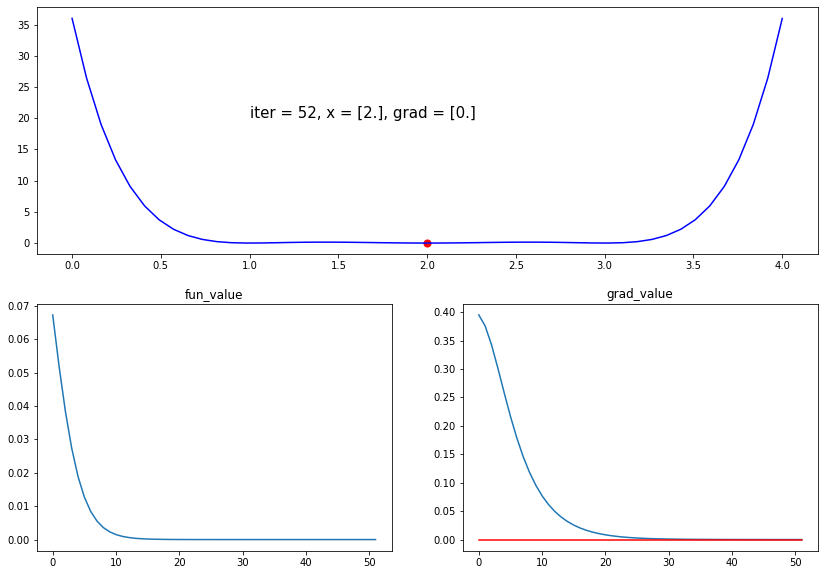

In [157]:
def func(x):
    fx = (x-1)*(x-2)*(x-3)
    grad = 3*pow(x,2) - 12*x + 11
    fx2 = pow(fx, 2)
    grad2 = 2 * fx * grad
    return fx2, grad2

lr = 0.1  # 学习速率，步长
tol = 1e-5  # 迭代精度

x = rand(1)*4  # 限定初始点范围[0,4)
X = np.array([])
fX = np.array([])
gX = np.array([])
fx, grad = func(x)

# 开始迭代
while abs(grad) > tol: 
# for i in range(5):
    x = x + lr*(-grad)
    fx, grad = func(x)
    
    plt.figure(figsize=(14, 10))
    plt.subplot(211)
    X0 = np.linspace(min(0,x), max(4,x))
    fX0, tmp = func(X0)
    plt.plot(X0, fX0, 'b-')

    X = np.append(X, x)
    fX = np.append(fX, fx)
    gX = np.append(gX, grad)
    
    plt.scatter(x, fx, color='red', s=50)
    plt.text(1, 20, 'iter = {}, x = {}, grad = {}'.format(len(X),np.round(x,4),np.round(grad,4)), fontsize=15)
    
    plt.subplot(223)
    plt.plot(range(len(fX)), fX)
    plt.title('fun_value')
    
    plt.subplot(224)
    plt.plot(range(len(gX)), gX)
    plt.plot(range(len(gX)), np.zeros(len(gX)), 'r-')
    plt.title('grad_value')
    
    display.clear_output(wait=True)
    plt.pause(0.0000000001)
    
plt.show()


## 牛顿法
牛顿方法和梯度下降法有什么异同点？请写出牛顿方法的推导过程，编程实现牛顿方法求解上一题，并编程绘图展示迭代计算过程。

**答案**  
牛顿法是二阶收敛，而梯度下降法是线性收敛的。具体推导如下：  
$$
f(x^{k+1}) = f(x^k) + f'(x^k)(x^{k+1}-x^k) + o(|x^{k+1}-x^k|^2)
$$
由于我们要求$f(x)$的零点，于是令上式等于0，得：  
$$
f(x^k) + f'(x^k)(x^{k+1}-x^k) = 0  
$$
化简得迭代公式为：  
$$
x^{k+1} = x^k - \frac{f(x^k)}{f'(x^k)}
$$

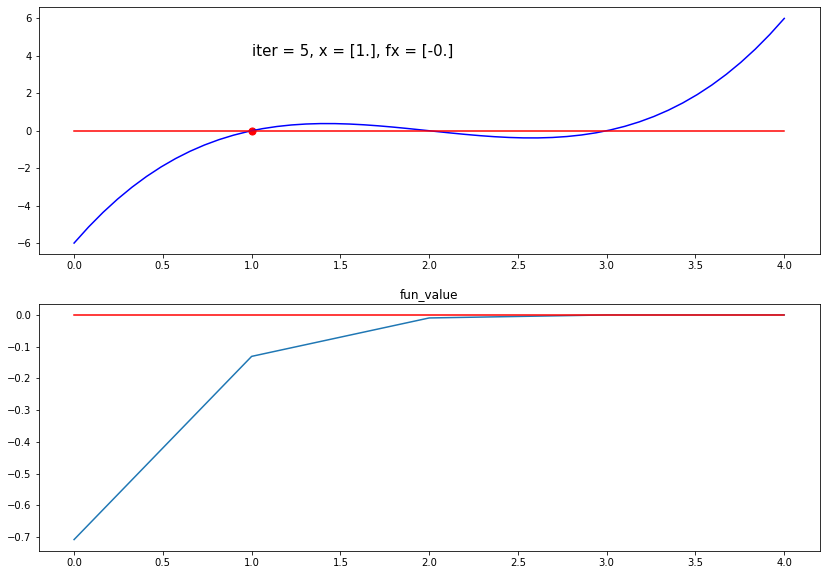

In [158]:
def func(x):
    fx = (x-1)*(x-2)*(x-3)
    grad = 3*pow(x,2) - 12*x + 11
    return fx, grad

lr = 1  # 学习速率，步长
tol = 1e-5  # 迭代精度

x = rand(1)*4  # 限定初始点范围[0,4)
X = np.array([])
fX = np.array([])
gX = np.array([])
fx, grad = func(x)

# 开始迭代
while abs(fx) > tol: 
# for i in range(5):
    x = x + lr*(-fx/grad)
    fx, grad = func(x)
    
    plt.figure(figsize=(14, 10))
    plt.subplot(211)
    X0 = np.linspace(min(0,x), max(4,x))
    fX0, tmp = func(X0)
    plt.plot(X0, fX0, 'b-')
    plt.plot(X0, np.zeros(len(X0)), 'r-')

    X = np.append(X, x)
    fX = np.append(fX, fx)
    gX = np.append(gX, grad)
    
    plt.scatter(x, fx, color='red', s=50)
    plt.text(1, 4, 'iter = {}, x = {}, fx = {}'.format(len(X),np.round(x,4),np.round(fx,4)), fontsize=15)
    
    plt.subplot(212)
    plt.plot(range(len(fX)), fX)
    plt.title('fun_value')
    plt.plot(range(len(gX)), np.zeros(len(gX)), 'r-')
    
    display.clear_output(wait=True)
    plt.pause(0.0000000001)
    
plt.show()


## 数据标准化
数据标准化是将数据按比例缩放到一个特定区间，其主要包括数据同趋化处理和无量纲化处理两个方面。数据标准化的方法有很多种，常用的有最小-最大标准化和z-score标准化。  
请用户对本题中的变量(不包括变量ID)进行z-score标准化。  
数据说明：本题数据来自KEEL，数据集一共包含1列ID，4列特征变量，共100个样本点。  
**答题要求：**对data中的列(不包括变量ID)进行z-score标准化，类型为DataFrame对象。

> 由于我没找到这个数据集，就用iris数据集来做吧，反正数据类型都一样，用起来没啥区别

In [166]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
data = pd.DataFrame(np.concatenate((iris.data,iris.target.reshape(150,1)), axis=1),
                           columns=np.append(iris.feature_names, 'target'))
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [169]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [180]:
from sklearn import preprocessing

# Z-Score标准化
# 建立StandardScaler对象
zscore = preprocessing.StandardScaler()
# 标准化处理
data_zs = zscore.fit_transform(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])

data_zs = pd.DataFrame(data_zs) #将array还原为dataframe
data_zs['target'] = data['target']
data_zs.columns = data.columns 

data_zs.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,0.0
